https://www.youtube.com/watch?v=_uFOoxDXxCI&t=33s

train retinanet resnet object detection

https://medium.com/@van.evanfebrianto/how-to-train-custom-object-detection-models-using-retinanet-aeed72f5d701

https://towardsdatascience.com/object-detection-on-aerial-imagery-using-retinanet-626130ba2203

https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/retinanet.ipynb?authuser=1#scrollTo=HEpwt6tQzspp

https://curiousily.com/posts/object-detection-on-custom-dataset-with-tensorflow-2-and-keras-using-python/

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 11.30 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
cd keras-retinanet/

/content/keras-retinanet


In [ ]:
!pip install .

Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168000 sha256=aa3c2f170ddad990a8cec7010818da1ed432506c229ecb81220be05435609ace
  Stored in directory: /root/.cache/pip/wheels/32/29/34/9b33c07f08b1be9e77607c1fc6b08c679489aa7ddaed329652
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=d7f20b29a72b8c5c74ed758c337b974232a2929d33db7cd4728c0fa182a1a9f5
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successf

In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/cells/cells_phase/annotations.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/cells/cells_phase/annotations_test.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/cells/cells_phase/classes.csv" "/content/keras-retinanet"
!cp -r "/content/drive/My Drive/cells/cells_phase/images" "/content/keras-retinanet"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from tensorflow.keras.models import load_model
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
os.makedirs("snapshots", exist_ok=True)

In [ ]:
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

Downloading...
From: https://drive.google.com/uc?id=1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R
To: /content/keras-retinanet/snapshots/resnet50_csv_10.h5
100% 249M/249M [00:02<00:00, 94.5MB/s]


In [ ]:
PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)
print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [ ]:
!keras_retinanet/bin/train.py \
 --freeze-backbone \
 --random-transform \
 --weights {PRETRAINED_MODEL} \
 --batch-size 8 \
 --steps 3 \
 --epochs 100 \
 csv annotations.csv classes.csv

Creating model, this may take a second...
2022-01-27 13:14:45.228866: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, None, None,   9408        ['input_1[0][0]']         

In [ ]:
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, './snapshots/model.h5')

('./snapshots/model.h5', <http.client.HTTPMessage at 0x7f538b2095d0>)

In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights snapshots/model.h5 --batch-size 8 --steps 6 --epochs 100 csv annotations.csv classes.csv

Creating model, this may take a second...
2022-01-28 05:34:48.420111: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [ ]:
# Con el modelo ya entrenado vamos a realizar predicciones
# Cargamos el modelo entrenado, y lo configuramos para que sea compatible con retinanet
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

snapshots/resnet50_csv_99.h5


In [ ]:
# Cargamos el archivo que contiene las etiquetas de las clases
labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()

In [ ]:
# Cargamos el archivo que contiene la información del dataset de prueba (annotations_test.csv)
test_df = pd.read_csv("annotations_test.csv")
test_df.head()

,images/18-Acquisition-20063790-0_phase_png.rf.b4d5bb6988aa5f7618e66a0100b0b13c.png,474,864,712,1099,cell
0,images/23-Acquisition-20063790-0_phase_png.rf....,667,1,920,194,cell
1,images/27-Acquisition-20063790-0_phase_png.rf....,324,197,562,410,cell
2,images/13-Acquisition-20063790-0_phase_png.rf....,1292,672,1567,964,cell
3,images/14-Acquisition-20063790-0_phase_png.rf....,504,262,734,502,cell
4,images/15-Acquisition-20063790-0_phase_png.rf....,374,474,604,702,cell


In [ ]:
# Obtenemos la predicción del modelo: boxes, scores, labels
import skimage.io as io

def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [ ]:
# Mostramos los objetos encontrardos en la imagen
# Se toman encuenta sólo los objetos que tienen asociada una probabilidad mayor a umbralScore
umbralScore = 0.8

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < umbralScore:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

images/23-Acquisition-20063790-0_phase_png.rf.b3a80e69d348ca729bc3423a6249a1ea.png 0


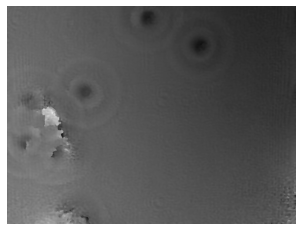

images/27-Acquisition-20063790-0_phase_png.rf.0738f6f97cb6064e3520568b199ff801.png 1


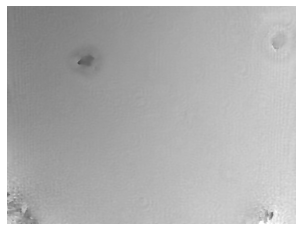

images/13-Acquisition-20063790-0_phase_png.rf.7a9c482a47382d26c2b7f5580e603a64.png 2


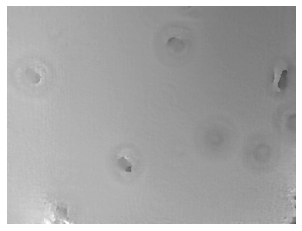

images/14-Acquisition-20063790-0_phase_png.rf.ea862a65e40070f5bddaf9ec4f2fe733.png 3


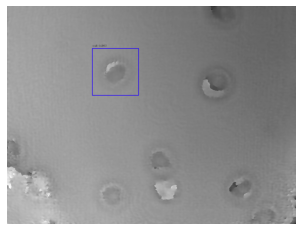

images/15-Acquisition-20063790-0_phase_png.rf.8466c23e65707b0852d49ad64492c7c0.png 4


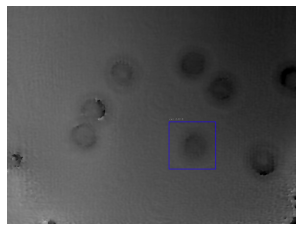

images/14-Acquisition-20063790-0_phase_png.rf.ea862a65e40070f5bddaf9ec4f2fe733.png 5


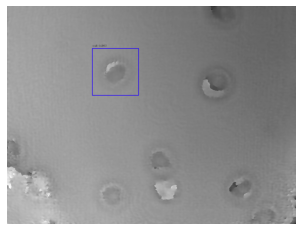

images/6-Acquisition-20063790-0_phase_png.rf.6e37ff66111276ed4692176a82cf1966.png 6


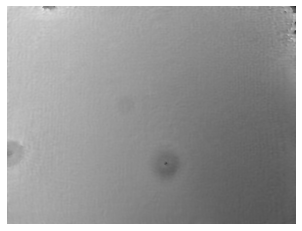

images/1-Acquisition-20063790-0_phase_png.rf.892fdfff3d383e6aa699af7c032c25c6.png 7


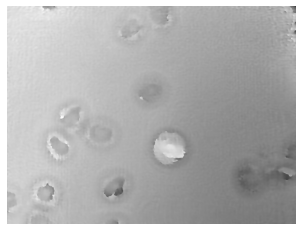

images/0-Acquisition-20063790-0_phase_png.rf.8d877af1028688647991f32edcfc79f6.png 8


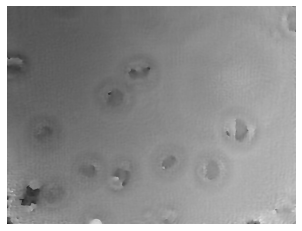

images/7-Acquisition-20063790-0_phase_png.rf.02546ca1cef364d590254331d37b2138.png 9


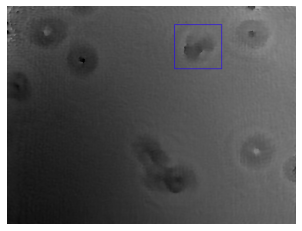

images/23-Acquisition-20063790-0_phase_png.rf.83bc5138925f8b54cc40e46f62732073.png 10


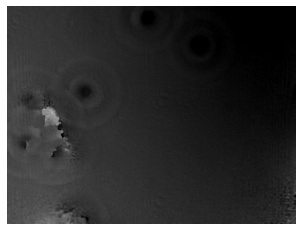

images/1-Acquisition-20063790-0_phase_png.rf.892fdfff3d383e6aa699af7c032c25c6.png 11


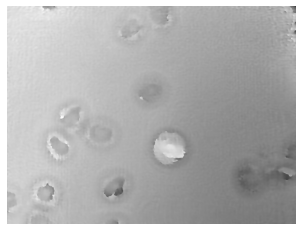

images/2-Acquisition-20063790-0_phase_png.rf.93c6154af9dc0213638b3d9a2c6adc3d.png 12


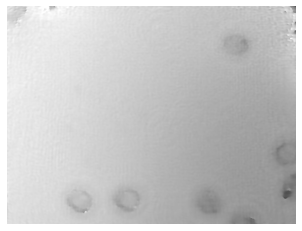

images/28-Acquisition-20063790-0_phase_png.rf.98c03e5342851cf91a6205639a853c52.png 13


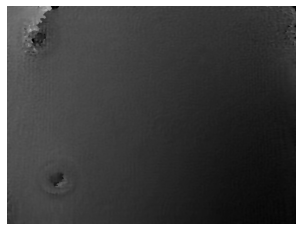

images/7-Acquisition-20063790-0_phase_png.rf.4097da9682c30c8866f9f04a98e5e15f.png 14


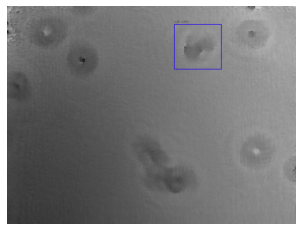

images/24-Acquisition-20063790-0_phase_png.rf.cd7ea08653d084357d3a677d33a4bc9c.png 15


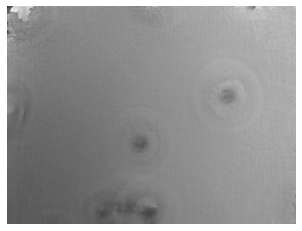

images/7-Acquisition-20063790-0_phase_png.rf.02546ca1cef364d590254331d37b2138.png 16


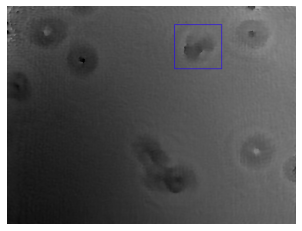

images/1-Acquisition-20063790-0_phase_png.rf.29aa219fef4a28567e73f2a72757ea89.png 17


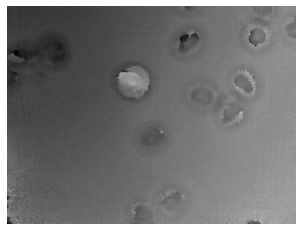

images/16-Acquisition-20063790-0_phase_png.rf.8048a931b807f05c4208ecc9622b4a36.png 18


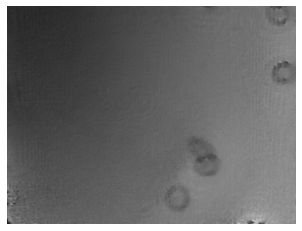

images/24-Acquisition-20063790-0_phase_png.rf.cd7ea08653d084357d3a677d33a4bc9c.png 19


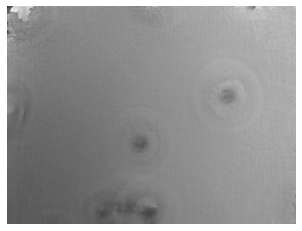

images/22-Acquisition-20063790-0_phase_png.rf.402e4e5d7bccc6a3311104ecfddcb5e1.png 20


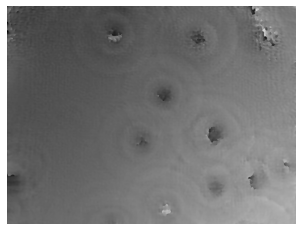

images/5-Acquisition-20063790-0_phase_png.rf.1db07b159b239dfc1c6ee5fb083c4bd8.png 21


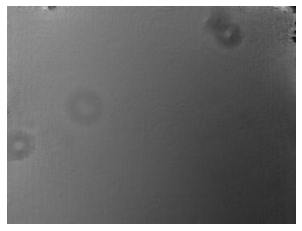

images/15-Acquisition-20063790-0_phase_png.rf.8466c23e65707b0852d49ad64492c7c0.png 22


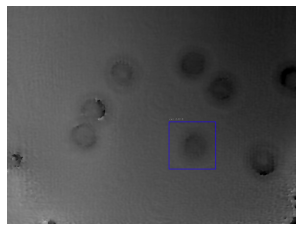

images/22-Acquisition-20063790-0_phase_png.rf.402e4e5d7bccc6a3311104ecfddcb5e1.png 23


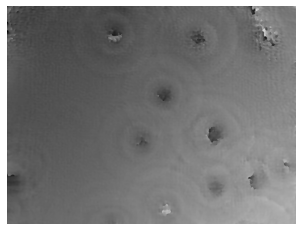

images/7-Acquisition-20063790-0_phase_png.rf.4097da9682c30c8866f9f04a98e5e15f.png 24


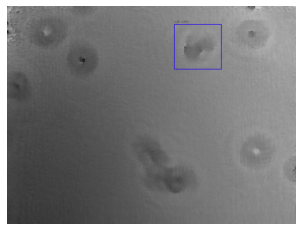

images/15-Acquisition-20063790-0_phase_png.rf.72d4a9fb38177f19a13f9ea4bc5c2fb1.png 25


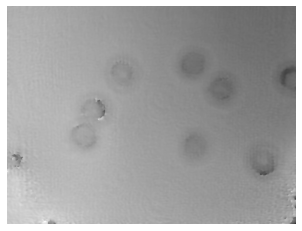

images/24-Acquisition-20063790-0_phase_png.rf.97364ebc2b77413b9bf0d5d1746ff7ce.png 26


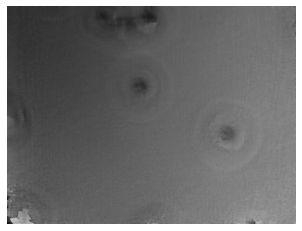

images/14-Acquisition-20063790-0_phase_png.rf.7b8189ecf2a98fb8ea66d0c2f22b5f4c.png 27


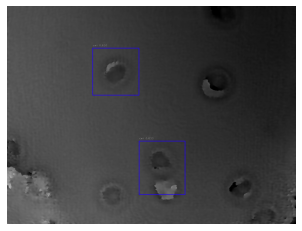

images/22-Acquisition-20063790-0_phase_png.rf.3e6bcaf7ae2831fba3ace5e0ffc57108.png 28


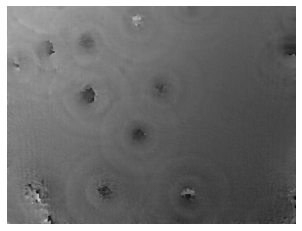

images/1-Acquisition-20063790-0_phase_png.rf.29aa219fef4a28567e73f2a72757ea89.png 29


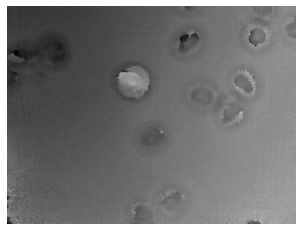

images/1-Acquisition-20063790-0_phase_png.rf.892fdfff3d383e6aa699af7c032c25c6.png 30


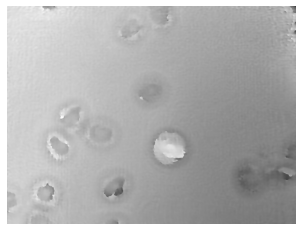

images/13-Acquisition-20063790-0_phase_png.rf.9a75fbc514dea44d716a6c7d530accac.png 31


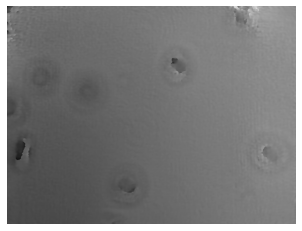

images/1-Acquisition-20063790-0_phase_png.rf.29aa219fef4a28567e73f2a72757ea89.png 32


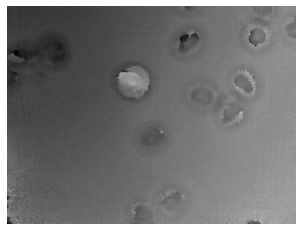

images/18-Acquisition-20063790-0_phase_png.rf.b208d4634bbcd421a3d48bba00fa2885.png 33


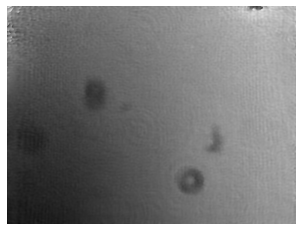

images/12-Acquisition-20063790-0_phase_png.rf.5e9d6fb55e33e3a590c38a5cfacc6b72.png 34


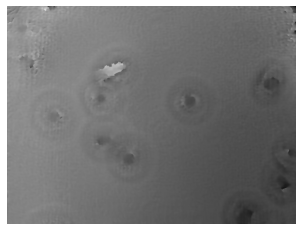

images/27-Acquisition-20063790-0_phase_png.rf.81a5e90b4e7006d2247b68cb25201bc4.png 35


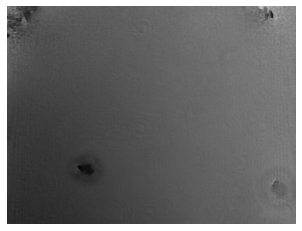

images/15-Acquisition-20063790-0_phase_png.rf.72d4a9fb38177f19a13f9ea4bc5c2fb1.png 36


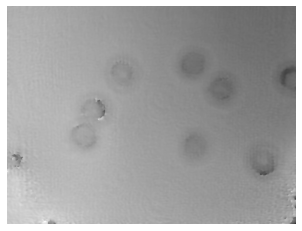

images/14-Acquisition-20063790-0_phase_png.rf.ea862a65e40070f5bddaf9ec4f2fe733.png 37


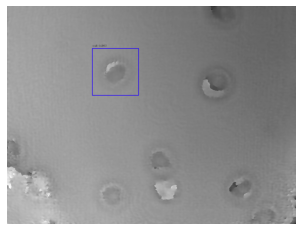

images/1-Acquisition-20063790-0_phase_png.rf.66773a044ed673dfac2505108f58be6e.png 38


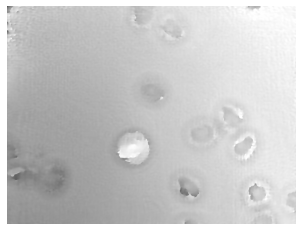

images/13-Acquisition-20063790-0_phase_png.rf.7a9c482a47382d26c2b7f5580e603a64.png 39


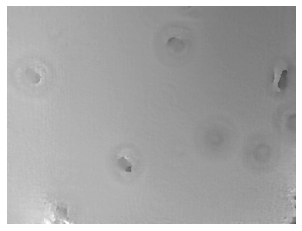

images/17-Acquisition-20063790-0_phase_png.rf.bf242c500e9b7250f8888271329a2f81.png 40


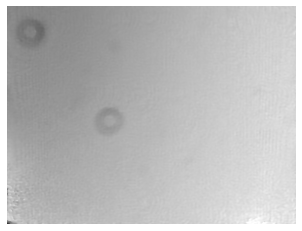

images/12-Acquisition-20063790-0_phase_png.rf.5e9d6fb55e33e3a590c38a5cfacc6b72.png 41


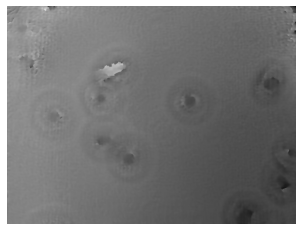

images/15-Acquisition-20063790-0_phase_png.rf.53d9484ea5a9b628d30b3dfb60b33163.png 42


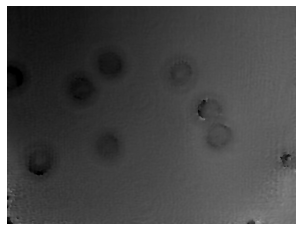

images/23-Acquisition-20063790-0_phase_png.rf.4319b6f36b11171e5b890a7addc88b40.png 43


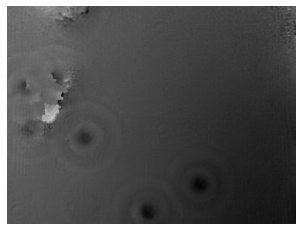

images/24-Acquisition-20063790-0_phase_png.rf.ebd698349cfc5043082b41c7e2862173.png 44


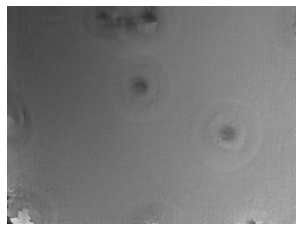

images/15-Acquisition-20063790-0_phase_png.rf.8466c23e65707b0852d49ad64492c7c0.png 45


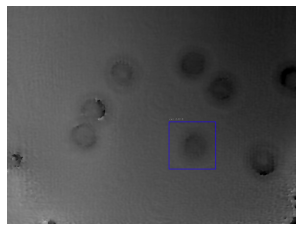

images/7-Acquisition-20063790-0_phase_png.rf.02546ca1cef364d590254331d37b2138.png 46


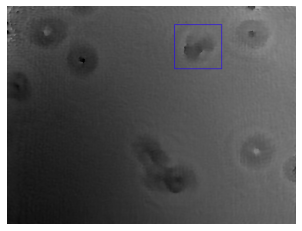

images/14-Acquisition-20063790-0_phase_png.rf.ea862a65e40070f5bddaf9ec4f2fe733.png 47


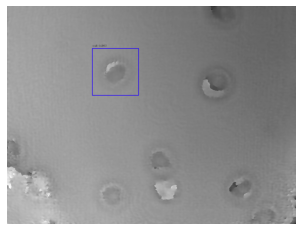

images/4-Acquisition-20063790-0_phase_png.rf.65ecc5d6255b41d336f7297d223348e6.png 48


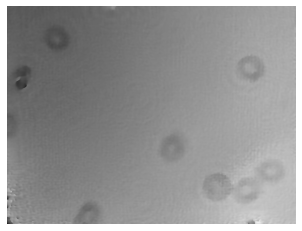

images/22-Acquisition-20063790-0_phase_png.rf.3e6bcaf7ae2831fba3ace5e0ffc57108.png 49


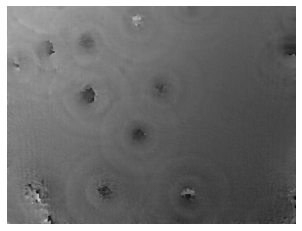

images/13-Acquisition-20063790-0_phase_png.rf.8b38f09dd7448cc523e69a8d2299768f.png 50


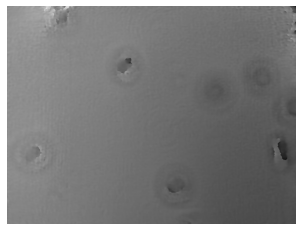

images/11-Acquisition-20063790-0_phase_png.rf.0c2e9355b7b3a5dd9f270c1892eef81c.png 51


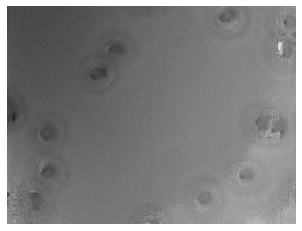

images/36-Acquisition-20063790-0_phase_png.rf.58a484ec908f2fe531d450b365d5b584.png 52


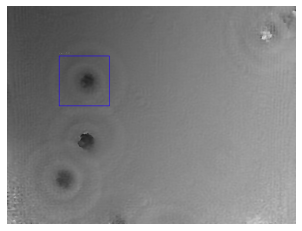

In [ ]:
# Recorremos todo el dataFramee de test para revisar las predicciones
for index, row in test_df.iterrows():
  print(row[0], index)
  image = io.imread(row[0])

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()